In [42]:
import pickle
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import random
import math

def eucl_dist(a, b, axis=1):
    return np.linalg.norm(a - b, axis=axis)

def get_1d_projection(x,dim_out=1,scaling=True):
    '''
    input: 
    x: original data, in np array
    dim_out: dimension of projected dataset,default is 1
    scaling: kept as true, scale x before pca
    '''
    x = StandardScaler().fit_transform(x)
    pca = PCA(n_components=dim_out)
    principalComponents = pca.fit_transform(x)

    return principalComponents

def get_best_1d(x):
    '''
    get best point from 1d projection of dataset
    output: the original point in dataset x (before pca), maybe multiple points qualified
    due to precision isclose, we then randomly pick from the best point set
    '''
    x_1d = get_1d_projection(x)
    x_median = np.mean(x_1d)
    
    '''
    best_pts = []
    for each in x_1d:
        #test if it's close to median value
        temp = np.isclose(each, x_median, rtol=1e-01, atol=1e-01, equal_nan=False)
        if temp:
            best_pt_ind = np.where(x_1d == each)
            #strip away brackets of np array and find best_pt from original x
            best_pt = x[best_pt_ind[0][0]]
            best_pts.append(best_pt)
    '''
    
    min_val = sum([x_1d[0]-a for a in x_1d])
    min_point = x_1d[0]
    print(min_point)
    for each in x_1d:
        distances = sum([math.pow((each-a),2) for a in x_1d])
        if distances <= min_val:
            min_val = distances
            min_point = each
            print(min_point)
            
    best_pt_ind = np.where(x_1d == min_point)
    best_pt = x[best_pt_ind[0][0]]

    #random pick one from best points 
    return best_pt

def get_center(k, X, first_pt_process = True):
    '''
    added a choice to choose first point more intelligently
    added control of this functionality
    '''
    temp = []
    if first_pt_process:
        #first center is appended here
        first_pt = get_best_1d(X)
        temp.append(first_pt)
    else:
        #original uniform random:
        temp.append(X[np.random.randint(0, len(X))])
    
    while len(temp)<k:
        d2 = np.array([min([np.square(eucl_dist(i,c, None)) for c in temp]) for i in X])
        prob = d2/d2.sum()
        cum_prob = prob.cumsum()
        r = np.random.random()
        ind = np.where(cum_prob >= r)[0][0]
        temp.append(X[ind])
    return np.array(temp)

def k_mean_pp(x, k,first_pt_process=True):
    # error = {key:0.0 for key in range(2,11)}
    # initalizing cluster variable
    center = get_center(k, x,first_pt_process)
    # for k in range(2,11):
    # assigining zeros to old centroids value
    center_old = np.zeros(center.shape)
    # initial error
    err = eucl_dist(center, center_old, None)

    cluster = {}
    
    while err != 0:
        # calculatin distance of data points from centroids and assiging min distance cluster centroid as data point cluster
        for i in range(len(x)):
            distances = eucl_dist(x[i], center)
            clust = np.argmin(distances)
            cluster[i] = clust
        # changing old centroids value
        center_old = np.copy(center)

        # Finding the new centroids by taking the average value
        for i in range(k):
            points = [x[j] for j in range(len(x)) if cluster[j] == i]
            if points:
                center[i] = np.mean(points, axis=0)

        # calculation difference between new centroid and old centroid values
        err = eucl_dist(center, center_old, None)

    # calculation total difference between cluster centroids and cluster data points
    error = 0
    for i in range(k):
        d = [eucl_dist(x[j], center[i], None) for j in range(len(x)) if cluster[j] == i]
        error += np.sum(d)

    # counting data points in all clusters
    count = {key: 0.0 for key in range(k)}
    for i in range(len(x)):
        count[cluster[i]] += 1

    # displaying cluster number, average distance between centroids and data points and cluster count
    # print(k, error / len(x), count)

    return cluster, error / len(x)

def auto_test(test_rounds,k):
    '''
    test function comparing kmeans++ 
    with modified first point selection
    test_rounds: rounds to test, per point error is used to compare
    k is cluster number to try
    '''
    use_pca_costs = []
    no_pca_costs = []

    for i in range(test_rounds):
        if i%10 == 1:
            print('Round: %d/%d'%(i,test_rounds))
        res_1,per_pt_cost_1 = k_mean_pp(x,k)
        use_pca_costs.append(per_pt_cost_1)
        
        res_2,per_pt_cost_2 = k_mean_pp(x,k,False)
        no_pca_costs.append(per_pt_cost_2)

    pca_avg_cost = np.mean(np.array(use_pca_costs))
    no_pca_avg_cost = np.mean(np.array(no_pca_costs))
    print('average per point cost: with pca, random first point')
    print(pca_avg_cost,no_pca_avg_cost)
    return pca_avg_cost,no_pca_avg_cost

In [45]:
def get_best_1d(x):
    '''
    get best point from 1d projection of dataset
    output: the original point in dataset x (before pca), maybe multiple points qualified
    due to precision isclose, we then randomly pick from the best point set
    '''
    x_1d = get_1d_projection(x)
    x_median = np.mean(x_1d)
    
    min_val = sum([math.pow(x_1d[0]-a,2) for a in x_1d])
    print(min_val)
    min_point = x_1d[0]
    for each in x_1d:
        distances = sum([math.pow((each-a),2) for a in x_1d])
        if distances <= min_val:
            min_val = distances
            print(min_val)
            min_point = each
            
    best_pt_ind = np.where(x_1d == min_point)
    best_pt = x[best_pt_ind[0][0]]

    #random pick one from best points 
    return best_pt

In [46]:
get_best_1d(x)

59528.30811524255
59528.30811524255
2837.378776109062
2659.058661307672
2647.493542918293
2646.6606469696794
2645.9562076507286
2643.427540164545
2641.6626282575376
2641.203358050683
2641.1613990592755


array([116, 105, 111, 110,  32,  32,  73, 110])

In [50]:
# loading dataset of form [[data1],[data2], ....]
inp = pickle.load(open('test.pickle', 'rb'))
x = np.array([i[0] for i in inp])

In [53]:
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

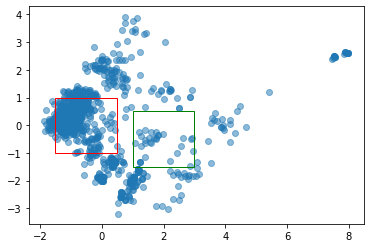

In [84]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

# Create figure and axes
fig,ax = plt.subplots(1)

plt.scatter(principalComponents[:,0], principalComponents[:,1], alpha=0.5)

# Create a Rectangle patch
rect1 = patches.Rectangle((-1.5,-1),2,2,linewidth=1,edgecolor='r',facecolor='none')
rect2 = patches.Rectangle((1,-1.5),2,2,linewidth=1,edgecolor='g',facecolor='none')


# Add the patch to the Axes
ax.add_patch(rect1)
ax.add_patch(rect2)


plt.show()

In [ ]:
if __name__ == '__main__':
    # loading dataset of form [[data1],[data2], ....]
    inp = pickle.load(open('test.pickle', 'rb'))
    x = np.array([i[0] for i in inp])

    # return cluster number for every data
    cluster = k_mean_pp(x)